In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df=pd.read_csv('capstone_dataset.csv')
df.head()

,StationId,State,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,Andhra Pradesh,Amaravati,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,Andhra Pradesh,Amaravati,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,Andhra Pradesh,Amaravati,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,Andhra Pradesh,Amaravati,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,Andhra Pradesh,Amaravati,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [ ]:
df.shape

(108035, 18)

**Interpretation** : There are 108035 observations and 18 features present in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   State       108035 non-null  object 
 2   City        108035 non-null  object 
 3   Date        108035 non-null  object 
 4   PM2.5       86410 non-null   float64
 5   PM10        65329 non-null   float64
 6   NO          90929 non-null   float64
 7   NO2         91488 non-null   float64
 8   NOx         92535 non-null   float64
 9   NH3         59930 non-null   float64
 10  CO          95037 non-null   float64
 11  SO2         82831 non-null   float64
 12  O3          82467 non-null   float64
 13  Benzene     76580 non-null   float64
 14  Toluene     69333 non-null   float64
 15  Xylene      22898 non-null   float64
 16  AQI         87025 non-null   float64
 17  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(5)
memory usage: 14.8

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   StationId   108035 non-null  object        
 1   State       108035 non-null  object        
 2   City        108035 non-null  object        
 3   Date        108035 non-null  datetime64[ns]
 4   PM2.5       86410 non-null   float64       
 5   PM10        65329 non-null   float64       
 6   NO          90929 non-null   float64       
 7   NO2         91488 non-null   float64       
 8   NOx         92535 non-null   float64       
 9   NH3         59930 non-null   float64       
 10  CO          95037 non-null   float64       
 11  SO2         82831 non-null   float64       
 12  O3          82467 non-null   float64       
 13  Benzene     76580 non-null   float64       
 14  Toluene     69333 non-null   float64       
 15  Xylene      22898 non-null   float64       
 16  AQ

**Interpretation** : There are 13 numerical features 4 categorical features and 1 datetime feature.

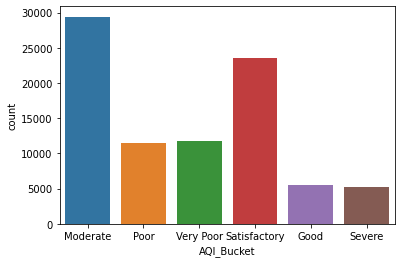

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
sns.countplot(df['AQI_Bucket'])
plt.show()

**Interpretation** : The airquality is mostly moderate and satisfactory in most of the cities.

In [ ]:
null_value_percentage=(df.isnull().sum()/len(df))*100
null_value_percentage = null_value_percentage.sort_values(ascending=False)
null_value_percentage

Xylene        78.805017
NH3           44.527237
PM10          39.529782
Toluene       35.823576
Benzene       29.115564
O3            23.666404
SO2           23.329477
PM2.5         20.016661
AQI           19.447401
AQI_Bucket    19.447401
NO            15.833758
NO2           15.316333
NOx           14.347202
CO            12.031286
State          0.000000
Date           0.000000
City           0.000000
StationId      0.000000
dtype: float64

**Interpretation** : we can see that there are about 79% of missing values in xylene. therefore , we have enough number of rows so that we can drop xylene
    other features has less than 60% so that we can treat them

In [ ]:
#Dropping columns which has more than 60% of missing values in the data
for i,j in null_value_percentage.iteritems():
    if (j>60):
        df.drop(i,axis=1,inplace=True)
df.columns                


Index(['StationId', 'State', 'City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2',
       'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI',
       'AQI_Bucket'],
      dtype='object')

In [ ]:
#By checking the skewness we can check whether our data is normally distributed or not.
#By that conclusion we will come to know that through which we will impute the missing data ,Either with mean or median
df.skew()

PM2.5       2.563924
PM10        1.644048
NO          3.288711
NO2         2.359287
NOx         2.539785
NH3         3.218919
CO         12.197951
SO2         4.581281
O3          6.844483
Benzene    21.617020
Toluene     4.598335
AQI         1.930088
dtype: float64

**Interpretation** : Over here Data is not normally distributed. We will impute with the help of Knn imputer because 

In [ ]:
df=df[df['AQI'].isnull()==False]

**Interpretation** : There are some missing values in our target variable, so we are dropping it.

In [ ]:
missing_values=df.isnull().sum()

In [ ]:
missing_values

StationId         0
State             0
City              0
Date              0
PM2.5          3488
PM10          23961
NO             2229
NO2            1566
NOx            4555
NH3           29832
CO             2896
SO2            9533
O3             9598
Benzene       19787
Toluene       26324
AQI               0
AQI_Bucket        0
dtype: int64

**Interpretation** : Now the data is imputed with the Knn imputer

In [ ]:
df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].median(),axis=0)
df['PM10']=df['PM10'].fillna(df['PM10'].median(),axis=0)
df['NO']=df['NO'].fillna(df['NO'].median(),axis=0)
df['NO2']=df['NO2'].fillna(df['NO2'].median(),axis=0)
df['NOx']=df['NOx'].fillna(df['NOx'].median(),axis=0)
df['NH3']=df['NH3'].fillna(df['NH3'].median(),axis=0)
df['CO']=df['CO'].fillna(df['CO'].median(),axis=0)
df['SO2']=df['SO2'].fillna(df['SO2'].median(),axis=0)
df['O3']=df['O3'].fillna(df['O3'].median(),axis=0)
df['Benzene']=df['Benzene'].fillna(df['Benzene'].median(),axis=0)
df['Toluene']=df['Toluene'].fillna(df['Toluene'].median(),axis=0)

In [ ]:
df.isnull().sum()

StationId     0
State         0
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

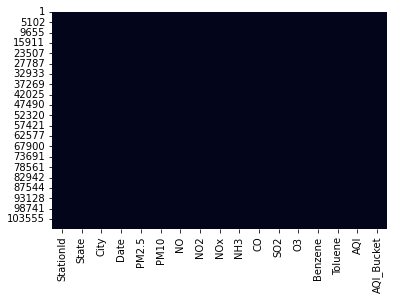

In [ ]:
sns.heatmap(df.isna(),cbar=False)
plt.show()

**Interpretation** : By the plot we can see that there is no missing values.Every missing values has been treated.

In [ ]:
df.shape

(87025, 17)

**Interpretation** : After treating the missing values our dataset shape is reduced to 87025 rows and 17 columns

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.00000,87025.000000,87025.000000,87025.000000,87025.000000
mean,79.416995,148.610429,22.910802,34.977047,42.458055,26.976453,1.593586,11.86730,37.501031,3.069497,13.154947,179.749290
std,74.575227,106.440785,34.284270,28.781179,44.316270,19.606079,4.184997,11.80353,37.399769,10.147303,25.854835,131.324339
min,0.040000,0.030000,0.020000,0.010000,0.000000,0.010000,0.000000,0.01000,0.010000,0.000000,0.000000,8.000000
25%,32.960000,89.370000,4.920000,15.390000,16.160000,18.000000,0.610000,5.53000,20.420000,0.480000,2.300000,86.000000
50%,56.170000,122.430000,10.220000,27.240000,28.180000,23.760000,0.950000,9.06000,30.890000,1.380000,5.310000,132.000000
75%,97.330000,167.020000,24.180000,46.290000,50.470000,29.740000,1.440000,13.96000,44.660000,2.830000,10.750000,254.000000
max,1000.000000,976.770000,437.850000,448.050000,434.900000,365.680000,175.810000,186.08000,963.000000,455.030000,454.850000,2049.000000


In [ ]:
dfcpy=df.copy()

In [ ]:
df['Date']=df['Date'].astype('object')

In [ ]:
#outlier treatment
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
df = df[~((df<( q1 - 1.5 * iqr) ) | (df > (q3+1.5*iqr))).any(axis=1)]
df.head()

,StationId,State,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
14,AP001,Andhra Pradesh,Amaravati,2017-08-12 00:00:00,122.88,208.86,5.56,54.87,33.71,17.96,0.27,22.97,68.60,0.36,6.28,310.0,Very Poor
15,AP001,Andhra Pradesh,Amaravati,2017-09-12 00:00:00,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,196.0,Moderate
16,AP001,Andhra Pradesh,Amaravati,2017-10-12 00:00:00,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,132.0,Moderate
17,AP001,Andhra Pradesh,Amaravati,2017-11-12 00:00:00,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,147.0,Moderate
18,AP001,Andhra Pradesh,Amaravati,2017-12-12 00:00:00,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,179.0,Moderate


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.shape

(50246, 17)

**Interpretation** : After Removing the outliers ,our observations reduced to 50246
.

In [ ]:
dfnum=df.select_dtypes(include=np.number)
dfnumx=dfnum.drop('AQI',1)

In [ ]:
#Standard ScaLing our data beacuse they are in different ranges
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_data=ss.fit_transform(dfnumx)

In [ ]:
df_scaled=pd.DataFrame(scaled_data,columns=dfnumx.columns)
df_scaled.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
0,2.049220,2.003715,-0.498434,1.854374,0.468580,-0.287899,-1.243370,2.910049,2.182599,-0.733170,0.320350
1,0.657202,0.663225,-0.442707,1.241395,0.187759,-0.529403,-1.618194,2.697322,1.704971,-0.814367,-0.015174
2,-0.029068,-0.098778,-0.893679,0.552877,-0.362838,-0.872708,-1.597371,1.057135,2.155665,-0.863084,-0.127766
3,0.204367,0.148947,-0.563448,1.035211,0.029033,-0.586801,-1.472429,1.995521,2.490843,-0.838725,0.146958
4,1.088842,0.470197,-0.249728,1.063693,0.187759,0.067318,-1.305841,-0.181455,0.750314,-0.798127,0.484734


**Interpretation** : Data is scaled because CO values are in mg/m3 and others are in ug/m3 

In [ ]:
y=df['AQI']

**Interpretation** : Here, the stationid,state,city,Date,is not considered to do predict our model. AQI,AQI_bucket is our target variable

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
X=sm.add_constant(df_scaled)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=10,test_size=0.25)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(37684, 12)
(12562, 12)
(37684,)
(12562,)


In [ ]:
ytrain=list(ytrain) #to avoid errors

In [ ]:
basemodel_lr=sm.OLS(ytrain,xtrain).fit()
basemodel_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 1.367e+04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:03:31   Log-Likelihood:            -1.8579e+05
No. Observations:               37684   AIC:                         3.716e+05
Df Residuals:                   37672   BIC:                         3.717e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.3080      0.173    702.987      0.000     120.970     121.646
PM2.5         56.9811      0.228    249.653      0.000      56.534      57.428
PM10          10.5193      0.231     45.478      0.000      10.066      10.973
NO             3.3246      0.267     12.434      0.000       2.800       3.849
NO2           -0.2712      0.255     -1.065      0.287      -0.771       0.228
NOx           -0.9520      0.328     -2.904      0.004      -1.595      -0.310
NH3           -0.8993      0.189     -4.765      0.000      -1.269      -0.529
CO             3.9760      0.186     21.359      0.000       3.611       4.341
SO2            3.0044      0.180     16.710      0.000       2.652       3.357
O3             3.3666      0.181     18.651      0.000       3.013       3.720
Benzene       -0.9181      0.203     -4.515      0.000      -1.317      -0.520
Toluene        2.0931      0.206     10.171      0.000       1.690       2.496
==============================================================================
Omnibus:                     9299.552   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59441.012
Skew:                           1.034   Prob(JB):                         0.00
Kurtosis:                       8.795   Cond. No.                         4.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation: 
     1)The performance of the model is about 80%.
     
     2)The Prob (F-statistic):0 ,so there is atleast a variable which is significant
     
     3)The coeff of PM2.5,PM10 is more than others, so it is the most important feature to predict AQI
     
     4)The Durbin-Watson:	1.996 ,SO there is no autocorrelation
     
     5)The Cond. No. 4.40 ,so there is no multicorrelation
     
     6)Jarque-Bera (JB):	49628.758 ,it says that our residuals are not normally distributed
    
    

In [ ]:
X_train=xtrain.drop('const',1)
X_test=xtest.drop('const',1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_mlr=LinearRegression().fit(X_train,ytrain)

In [ ]:
MLR_pvalues = pd.DataFrame(basemodel_lr.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues

,P-Value
const,0.000000e+00
PM2.5,0.000000e+00
PM10,0.000000e+00
NO,2.003233e-35
NO2,2.869832e-01
NOx,3.683367e-03
NH3,1.894038e-06
CO,1.283777e-100
SO2,1.846371e-62
O3,2.765328e-77


In [ ]:
# subset the dataframe 'MLR_pvalues' such that the variables will have p-value greater than 0.05
# store the subset of a dataframe to a new dataframe 'insignificant_var' 
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['NO2']

In [ ]:
# drop the insignificant variables from the dataframe 'X_train_signi_var'
# 'axis = 1' drops the corresponding column(s)
X_train_signi_var = xtrain.drop(insigni_var, axis=1)

# drop the insignificant variables from the dataframe 'X_test_signi_var'
# 'axis = 1' drops the corresponding column(s)
X_test_signi_var = xtest.drop(insigni_var, axis=1)

# building a model on training dataset
# fit() is used to fit the OLS model
MLR_model_with_significant_var = sm.OLS(ytrain, X_train_signi_var).fit()

# print the summary output
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 1.504e+04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:03:34   Log-Likelihood:            -1.8579e+05
No. Observations:               37684   AIC:                         3.716e+05
Df Residuals:                   37673   BIC:                         3.717e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.3084      0.173    702.989      0.0

In [ ]:
xsig=X_train[['PM2.5', 'PM10', 'NO', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']]

In [ ]:
lr=LinearRegression()
sigvar_model=lr.fit(xsig,ytrain)

In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, ytrain)

In [ ]:
# print the selected feature names when k_features = 12
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('PM2.5', 'PM10', 'NO', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene')

R-Squared:  0.7994683615774747


In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_backward = linreg_backward.fit(X_train, ytrain)

In [ ]:
# print the selected feature names when k_features = 12
print('Features selelected using backward selection are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward selection are: 
('PM2.5', 'PM10', 'NO', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene')

R-Squared:  0.7994683615774747


In [ ]:
xtrain.drop('const',1,inplace=True)

In [ ]:
#rfe
cols = list(xtrain.columns)
pmax = 1
while (len(cols)>0):
    p= []
    xtrain = xtrain[cols]
    Xc = sm.add_constant(xtrain)
    model = sm.OLS(ytrain,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['PM2.5', 'PM10', 'NO', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']


In [ ]:
xtrain=sm.add_constant(xtrain)

In [ ]:
xtrain.head()

,const,PM2.5,PM10,NO,NOx,NH3,CO,SO2,O3,Benzene,Toluene
788,1.0,-0.680682,-1.041719,0.609904,0.227876,-1.160780,0.838983,2.192343,-0.598776,3.716390,1.509321
12696,1.0,-0.711902,-0.646746,2.262091,1.719196,0.340229,-1.805606,0.144594,-0.723869,-1.025477,-1.093806
34726,1.0,-0.465005,-0.569258,-0.313711,-0.294231,-0.066971,-0.389606,-0.109883,-0.026580,-0.627615,-0.440772
4625,1.0,1.847291,1.535812,-0.353958,2.431425,0.340229,-0.160547,0.144594,-0.060697,0.095033,0.101921
19426,1.0,0.090943,0.290844,-0.755395,-0.301790,0.340229,-0.285488,0.925920,1.619980,-1.025477,-1.093806


In [ ]:
xtrainsig=xtrain.drop('const',1)

In [ ]:
xtestsig=xtest.drop(['const','NO2'],1)

In [ ]:
xtest.head()

,const,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
19863,1.0,-0.876882,0.290844,-0.706892,-0.546770,-0.350047,0.340229,-0.160547,-0.835542,0.225402,-1.025477,-1.093806
26911,1.0,0.138489,-0.728991,-0.602663,-0.863166,-0.688428,0.340229,-0.098076,-1.135746,-0.074463,0.095033,0.101921
6473,1.0,-0.511978,0.545506,-0.229089,0.146701,-0.261091,0.459357,0.339218,-0.058192,0.054222,1.248021,4.083174
27055,1.0,0.138489,-1.147349,-0.668709,-1.001241,-0.757035,0.340229,0.047689,-0.427980,-0.074463,0.095033,0.101921
45690,1.0,0.970263,0.290844,0.939103,0.012341,0.147060,0.340229,2.900513,-0.736136,1.790561,-1.025477,-1.093806


In [ ]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(xtrainsig)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(ytrain, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [ ]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(xtestsig)

    # MSE for the test data
    mse_test = mean_squared_error(ytest, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [ ]:
X.head()

,const,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
0,1.0,2.049220,2.003715,-0.498434,1.854374,0.468580,-0.287899,-1.243370,2.910049,2.182599,-0.733170,0.320350
1,1.0,0.657202,0.663225,-0.442707,1.241395,0.187759,-0.529403,-1.618194,2.697322,1.704971,-0.814367,-0.015174
2,1.0,-0.029068,-0.098778,-0.893679,0.552877,-0.362838,-0.872708,-1.597371,1.057135,2.155665,-0.863084,-0.127766
3,1.0,0.204367,0.148947,-0.563448,1.035211,0.029033,-0.586801,-1.472429,1.995521,2.490843,-0.838725,0.146958
4,1.0,1.088842,0.470197,-0.249728,1.063693,0.187759,0.067318,-1.305841,-0.181455,0.750314,-0.798127,0.484734


In [ ]:
X.head()

,const,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
0,1.0,2.049220,2.003715,-0.498434,1.854374,0.468580,-0.287899,-1.243370,2.910049,2.182599,-0.733170,0.320350
1,1.0,0.657202,0.663225,-0.442707,1.241395,0.187759,-0.529403,-1.618194,2.697322,1.704971,-0.814367,-0.015174
2,1.0,-0.029068,-0.098778,-0.893679,0.552877,-0.362838,-0.872708,-1.597371,1.057135,2.155665,-0.863084,-0.127766
3,1.0,0.204367,0.148947,-0.563448,1.035211,0.029033,-0.586801,-1.472429,1.995521,2.490843,-0.838725,0.146958
4,1.0,1.088842,0.470197,-0.249728,1.063693,0.187759,0.067318,-1.305841,-0.181455,0.750314,-0.798127,0.484734


In [ ]:
x.head()

NameError: name 'x' is not defined

In [ ]:
x=X.drop('const',1)

In [ ]:
x.drop('NO2',1,inplace=True)

In [ ]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': x.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

In [ ]:
ytrain=np.array(ytrain)

In [ ]:
X_train.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
788,-0.680682,-1.041719,0.609904,0.668043,0.227876,-1.160780,0.838983,2.192343,-0.598776,3.716390,1.509321
12696,-0.711902,-0.646746,2.262091,-0.144928,1.719196,0.340229,-1.805606,0.144594,-0.723869,-1.025477,-1.093806
34726,-0.465005,-0.569258,-0.313711,0.235862,-0.294231,-0.066971,-0.389606,-0.109883,-0.026580,-0.627615,-0.440772
4625,1.847291,1.535812,-0.353958,2.203586,2.431425,0.340229,-0.160547,0.144594,-0.060697,0.095033,0.101921
19426,0.090943,0.290844,-0.755395,-0.464420,-0.301790,0.340229,-0.285488,0.925920,1.619980,-1.025477,-1.093806


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# significant features model

In [ ]:
xtrainsig

,PM2.5,PM10,NO,NOx,NH3,CO,SO2,O3,Benzene,Toluene
788,-0.680682,-1.041719,0.609904,0.227876,-1.160780,0.838983,2.192343,-0.598776,3.716390,1.509321
12696,-0.711902,-0.646746,2.262091,1.719196,0.340229,-1.805606,0.144594,-0.723869,-1.025477,-1.093806
34726,-0.465005,-0.569258,-0.313711,-0.294231,-0.066971,-0.389606,-0.109883,-0.026580,-0.627615,-0.440772
4625,1.847291,1.535812,-0.353958,2.431425,0.340229,-0.160547,0.144594,-0.060697,0.095033,0.101921
19426,0.090943,0.290844,-0.755395,-0.301790,0.340229,-0.285488,0.925920,1.619980,-1.025477,-1.093806
...,...,...,...,...,...,...,...,...,...,...
40059,0.101541,0.290844,-0.893679,-0.459352,0.340229,-0.785253,-0.463766,-0.243249,-0.335308,0.203254
28017,-0.174572,-0.815596,-0.372533,0.617422,-1.527910,-0.681135,-1.380283,1.666067,0.095033,0.101921
29199,-0.131035,-0.676869,-0.602663,-0.373303,0.340229,0.693218,0.273821,-0.453333,-0.440863,0.101921
40061,-0.469874,0.290844,-0.893679,-0.847154,0.340229,-0.993488,-0.815661,-0.391684,0.168109,-0.652445


In [ ]:
model_sig=lr.fit(xtrainsig,ytrain)

In [ ]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(model_sig))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(model_sig))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(model_sig) - get_train_rmse(model_sig))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  33.4921
RMSE on test set:  33.4793
Difference between RMSE on train and test set:  0.01279999999999859


# SGD

In [ ]:
from sklearn.linear_model import SGDRegressor


In [ ]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(xtrainsig, ytrain)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 33.5323
RMSE on test set: 33.5178


In [ ]:
plt.rcParams['figure.figsize']=[15,8]

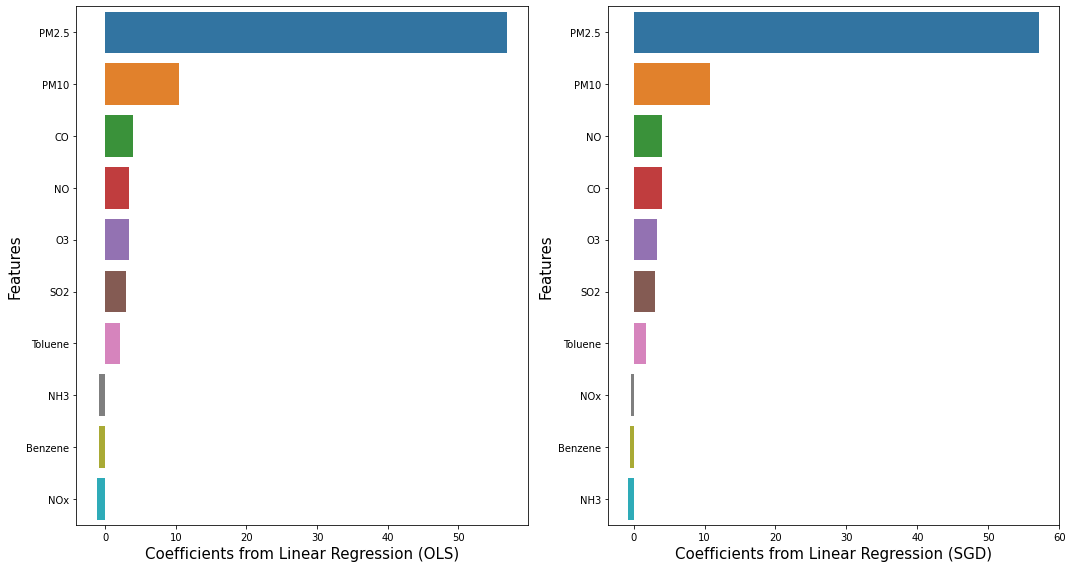

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(model_sig, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# RIDGE

In [ ]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(xtrainsig, ytrain)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on train set:', get_train_rmse(ridge))

RMSE on test set: 33.4792


In [ ]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(xtestsig, ytest)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 33.4653


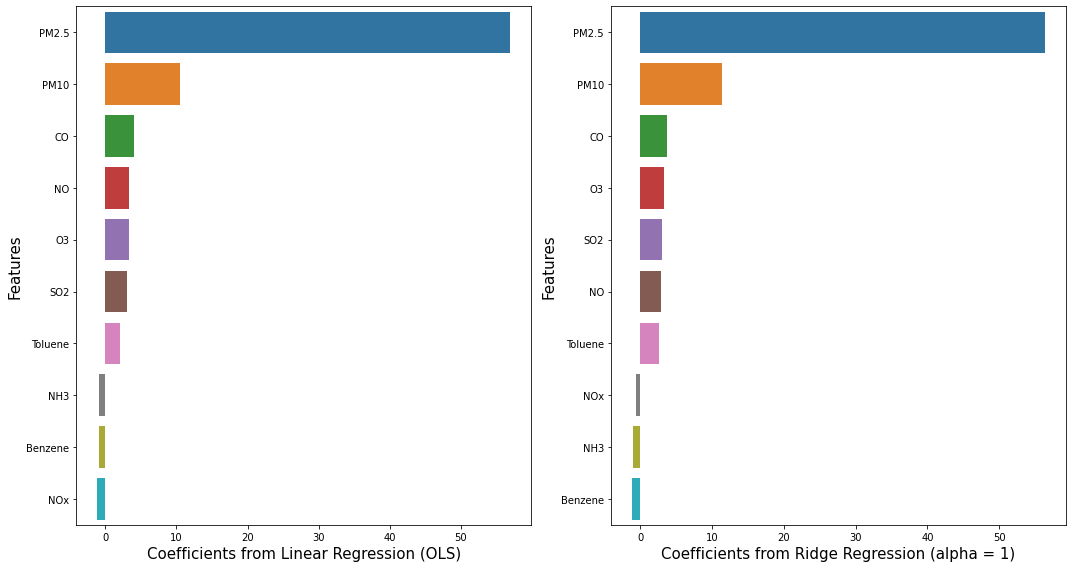

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(model_sig, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 1)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

# LASSO

In [ ]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(xtrainsig, ytrain)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 33.4793


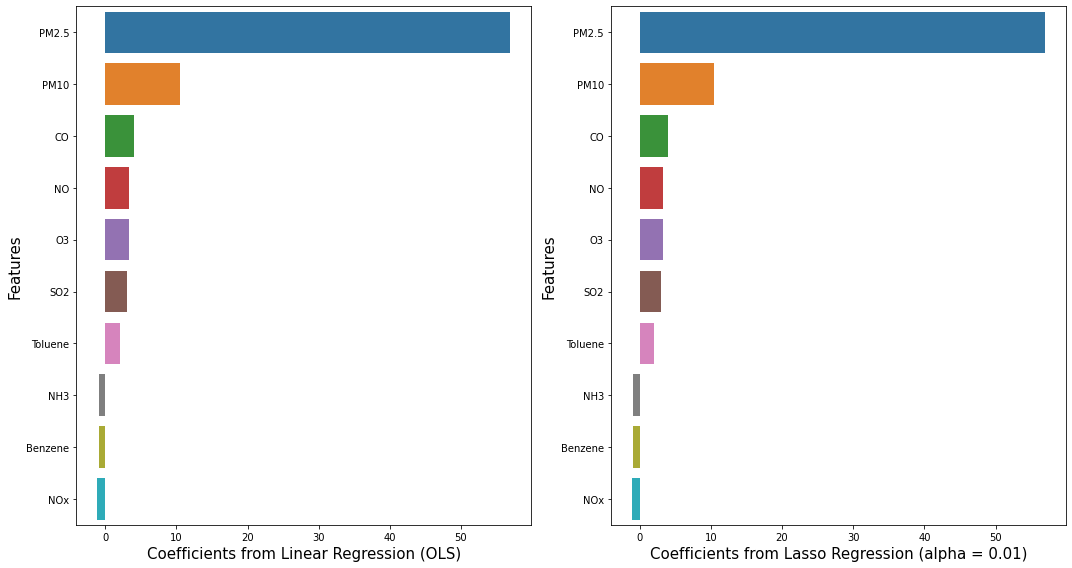

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(model_sig, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

# ELASTICNET

In [ ]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(xtrainsig, ytrain)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 33.8889


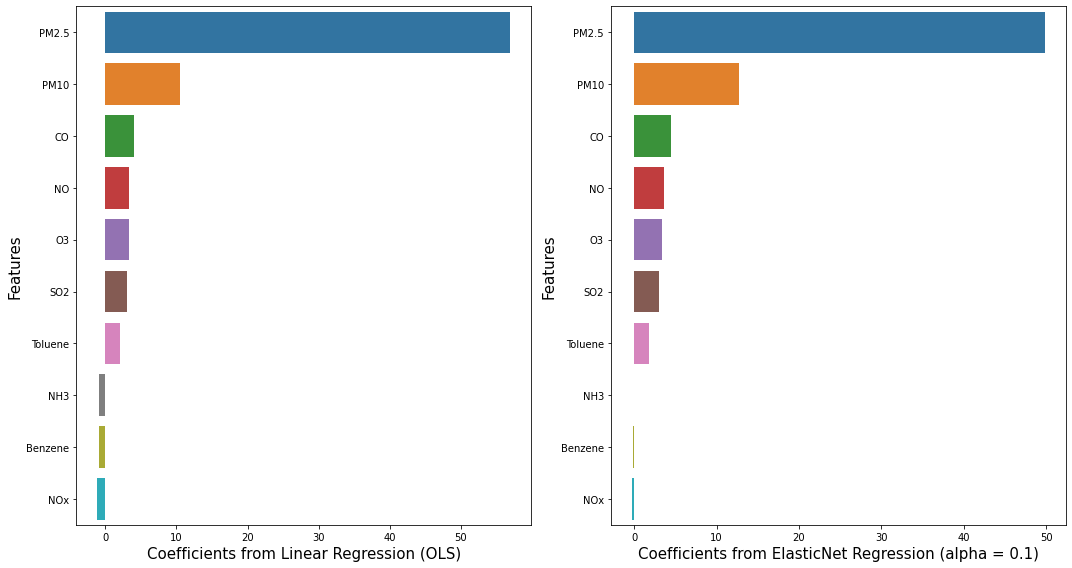

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(model_sig, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(enet, 'ElasticNet Regression (alpha = 0.1)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

# XGBOOST 


In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model =XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

# fit the model using fit() on train data
xgb_model.fit(xtrainsig, ytrain)
print('RMSE on test set:', get_test_rmse(xgb_model))

RMSE on test set: 26.9618


In [ ]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor()

In [ ]:
br.fit(xtrainsig, ytrain)
print('RMSE on test set:', get_test_rmse(br))

RMSE on test set: 28.0323


# adaboostregressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [ ]:
abr=AdaBoostRegressor(base_estimator=model_mlr)

In [ ]:
abr.fit(xtrainsig, ytrain)
print('RMSE on test set:', get_test_rmse(abr))

RMSE on test set: 33.6397


# hyperparametertuning

# RIDGE TUNING

In [ ]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(xtrainsig, ytrain)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 10} 

RMSE on test set: 33.4791


# LASSO TUNING

In [ ]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(xtrainsig, ytrain)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

C:\Users\Rohith Moorthy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.008e+07, tolerance: 1.907e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rohith Moorthy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.627e+06, tolerance: 1.886e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rohith Moorthy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number o

Best parameters for Lasso Regression:  {'alpha': 0.0001} 

RMSE on test set: 33.4817


# ELASTICNET TUNING

In [ ]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(xtrainsig, ytrain)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

KeyboardInterrupt: 

# SGD REGRESSOR TUNING

In [ ]:
    
param_grid = { 'alpha': 10.0 ** -np.arange(1, 7), 
        
               'loss': ['squared_loss'], 
    
               'penalty': ['l2', 'l1', 'elasticnet'],
    
               'learning_rate': ['constant', 'optimal', 'invscaling']
}

# using sklearn’s GridSearchCV, we define our grid of parameters to search over and then run the grid search
clf = GridSearchCV(linreg_with_SGD, param_grid)

# fit the model on train data
clf.fit(xtrainsig, ytrain)

C:\Users\Rohith Moorthy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Rohith Moorthy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Rohith Moorthy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


GridSearchCV(estimator=SGDRegressor(random_state=10),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [ ]:
# print the best parameters
# print best alpha value
print('Best alpha:', clf.best_estimator_.alpha)

# print best tolerance
print('Best tol:', clf.best_estimator_.tol) 

# print best starting rate (Use eta0 to specify the starting learning)
print('Best eta0:', clf.best_estimator_.eta0)

# print best learning rate
print('Best learning rate:', clf.best_estimator_.learning_rate) 
print('Best penalty:', clf.best_estimator_.penalty) 

Best alpha: 0.01
Best tol: 0.001
Best eta0: 0.01
Best learning rate: optimal
Best penalty: l1


# XGBOOST TUNING

In [ ]:
# create a dictionary with hyperparameters and its values
# learning_rate: pass the list of boosting learning rates
# max_depth: pass the range of values as the maximum tree depth for base learners
# gamma: pass the list of minimum loss reduction values required to make a further partition on a leaf node of the tree
tuning_parameters = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           "gamma" : [0.1, 0.5 ,1 ],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

# instantiate the 'XGBRegressor' 
xgb_model = XGBRegressor(base_estimator=model_sig)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost REgressor model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 4, scoring = 'neg_mean_squared_error',n_jobs=-1)

# fit the model on X_train and y_train using fit()
xgb_grid.fit(xtrainsig, ytrain)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[13:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best parameters for XGBoost classifier:  {'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000} 



# bagging regressor tuning


In [ ]:
params = {'base_estimator': [None,model_sig,xbgmodel2],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0, ],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(xtrainsig, ytrain)
print('Best parameters for bagging regressor: ', bagging_regressor_grid.best_params_, '\n')

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters for bagging regressor:  {'base_estimator': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=1, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...), 'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100} 



In [ ]:
brtuned=BaggingRegressor(base_estimator=model_sig,bootstrap=False,bootstrap_features=False,max_features=1,max_samples=0.5,n_estimators=100)

In [ ]:
brtunedmodel=brtuned.fit(xtrainsig,ytrain)

In [ ]:
brtunedmodel.score(xtrainsig,ytrain)

0.3323926810463925

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(sgd, xtrainsig, ytrain, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -24.505 (0.293)


In [ ]:
from mlxtend.evaluate import bias_variance_decomp


In [ ]:
y_train,y_test=ytrain,ytest

In [ ]:
X_train

array([[-0.68068173, -1.04171911,  0.60990404, ..., -0.59877626,
         3.71639045,  1.50932128],
       [-0.71190189, -0.64674606,  2.26209094, ..., -0.72386933,
        -1.02547713, -1.09380553],
       [-0.4650049 , -0.56925762, -0.31371075, ..., -0.02658022,
        -0.62761495, -0.44077198],
       ...,
       [-0.13103519, -0.67686945, -0.60266286, ..., -0.45333313,
        -0.44086332,  0.10192141],
       [-0.46987409,  0.29084425, -0.89367892, ..., -0.39168439,
         0.1681094 , -0.65244492],
       [-0.60735734, -0.795183  , -0.34260596, ..., -0.06728036,
         0.09503268,  0.10192141]])

In [ ]:
model = LinearRegression()
mse, bias, var = bias_variance_decomp(xbgmodel2, X_train, ytrain, X_test, ytest, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 714.906
Bias: 695.866
Variance: 19.041


In [ ]:
from sklearn.ensemble import BaggingRegressor

# FITTING MODELS USING TUNED PARAMETERS

In [ ]:
br=BaggingRegressor(base_estimator=model_mlr)

In [ ]:
sgd = SGDRegressor(alpha=0.01,tol=0.001,eta0=0.01,learning_rate='optimal',penalty='l1',random_state = 10)

In [ ]:
ridge=Ridge(alpha = 10, max_iter = 500)
lasso=Lasso(alpha=0.0001,max_iter=500)
enet = ElasticNet(alpha = 0.0001, l1_ratio = 0.0001, max_iter = 500)

In [ ]:
xgb_model =XGBRegressor(n_estimators=1000, max_depth=10, colsample_bytree=0.7,gamma=1,learning_rate=0.01)

xbgmodel2=XGBRegressor(max_depth=7,gamma=1,learning_rate=0.05)
xgb_model3 =XGBRegressor(n_estimators=500, max_depth=7, subsample=0.7, colsample_bytree=0.8,gamma=1,learning_rate=0.01)


In [ ]:
xgb_model4=XGBRegressor(base_estimator=ridge,max_depth=7,gamma=1,learning_rate=0.05)

In [ ]:
ridge_model=ridge.fit(xtrainsig,ytrain)
lasso_model=lasso.fit(xtrainsig,ytrain)
enet_model=enet.fit(xtrainsig,ytrain)
sgd_model=sgd.fit(xtrainsig,ytrain)
xgb_model=xgb_model.fit(xtrainsig,ytrain)
xbgmodel2=xbgmodel2.fit(xtrainsig,ytrain)

In [ ]:
bagr=br.fit(xtrainsig,ytrain)
brtuned=brtuned.fit(xtrainsig,ytrain)

In [ ]:

xgb_model4=xgb_model4.fit(xtrainsig,ytrain)


[17:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "base_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [ ]:
lr=LinearRegression()
modelsig=lr.fit(xtrainsig,ytrain)

In [ ]:
all_model=[modelsig,ridge_model,lasso_model,enet_model,sgd_model,xgb_model,xbgmodel2,xgb_model4,brtunedmodel]

In [ ]:
model_scores = { "Model Name" : [],
                "R2_score_train" : [],
               "adj r2 train" : [],
               "MSE_train" : [],
               "RMSE train" : [],
                "MAE Train" : [],
               "R2_score_test" : [],
               "adj r2 test" : [],
               "MSE_test" : [],
               "RMSE test" : [],
               "MAE test" : []}


for model in all_model:
    model_scores['Model Name'].append(str(model))
    
    #model_scores['Model Name'].append(str(model))
    
    model_scores['R2_score_train'].append(model.score(xtrainsig,ytrain))
    r2_train=model.score(xtrainsig,ytrain)
    pred_tr = model.predict(xtrainsig)
    n = len(xtrainsig)
    k = len(xtrainsig.columns)
    model_scores['adj r2 train'].append(1 - (((1 - r2_train) * (n - 1)) / (n - k - 1)))
    model_scores['MSE_train'].append(mean_squared_error(ytrain,pred_tr))
    msetrain=mean_squared_error(ytrain,pred_tr)
    model_scores['RMSE train'].append(round(np.sqrt(msetrain), 4))
    model_scores['MAE Train'].append(mean_absolute_error(ytrain,pred_tr))
    
    
    model_scores['R2_score_test'].append(model.score(xtestsig,ytest))
    r2_test=model.score(xtestsig,ytest)

    pred_ts = model.predict(xtestsig)
    n = len(xtestsig)
    k = len(xtestsig.columns)
    model_scores['adj r2 test'].append(1 - (((1 - r2_test) * (n - 1)) / (n - k - 1)))
    model_scores['MSE_test'].append(mean_squared_error(ytest,pred_ts))
    msetest=mean_squared_error(ytest,pred_ts)
    model_scores['RMSE test'].append(round(np.sqrt(msetest), 4))
    model_scores['MAE test'].append(mean_absolute_error(ytest,pred_ts))

In [ ]:
scores_df=pd.DataFrame(model_scores)

In [ ]:
scores_df

,Model Name,R2_score_train,adj r2 train,MSE_train,RMSE train,MAE Train,R2_score_test,adj r2 test,MSE_test,RMSE test,MAE test
0,LinearRegression(),0.799662,0.799608,1121.717853,33.4921,24.484810,0.798414,0.798254,1120.861438,33.4793,24.663053
1,"Ridge(alpha=10, max_iter=500)",0.799662,0.799608,1121.718174,33.4921,24.484624,0.798416,0.798256,1120.849242,33.4791,24.662619
2,"Lasso(alpha=0.0001, max_iter=500)",0.799662,0.799608,1121.717853,33.4921,24.484806,0.798414,0.798254,1120.861415,33.4793,24.663041
3,"ElasticNet(alpha=0.0001, l1_ratio=0.0001, max_...",0.799662,0.799608,1121.717899,33.4921,24.484739,0.798415,0.798255,1120.856767,33.4792,24.662888
4,"SGDRegressor(alpha=0.01, learning_rate='optima...",0.799642,0.799588,1121.830171,33.4937,24.509054,0.798451,0.798290,1120.658796,33.4762,24.682701
5,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.948098,0.948084,290.605964,17.0472,10.535646,0.874945,0.874846,695.331300,26.3691,16.107285
6,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.898798,0.898772,566.639174,23.8042,14.797322,0.873432,0.873331,703.747444,26.5282,16.228018
7,"XGBRegressor(base_estimator=Ridge(alpha=10, ma...",0.898798,0.898772,566.639174,23.8042,14.797322,0.873432,0.873331,703.747444,26.5282,16.228018
8,BaggingRegressor(base_estimator=LinearRegressi...,0.332393,0.332215,3738.011168,61.1393,45.081402,0.334483,0.333953,3700.420841,60.8311,44.895085


In [ ]:
scores_df.to_csv('capstone_model_scores_final.csv')